In [2]:

% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model
#from sklearn.cross_validation import train_test_split #old package
from sklearn.model_selection import train_test_split #new package

# Load the Boston Housing dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target #only making y the target bc it's a preloaded dataset; otw you choose your dependent var


# Take a look at the data again
df.head()
df.shape


'''
Scikit-learn has a nice function to split a dataset for testing and training called train_test_split. The test_size keyword argument indicates the proportion of the data that should be held over for testing.
'''

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

# check that train, shapes have same numbers of rows
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape



(353, 10) (353,)
(89, 10) (89,)


In [4]:
lm = linear_model.LinearRegression()

# pass in the training set
model = lm.fit(X_train, y_train)


In [5]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Cross-validated scores: [ 0.51303012  0.43764952  0.44864366  0.52765071  0.51550742  0.33549085] 0.462995379745
Cross-Predicted Accuracy: 0.50364673664


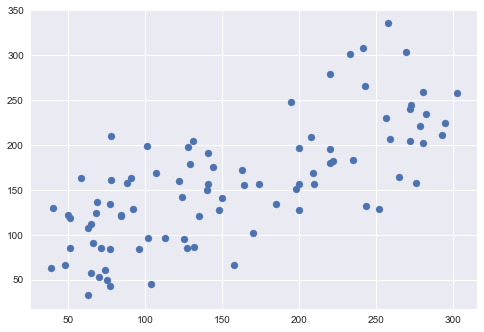

In [14]:

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
# assumes you already tested a fit and scores it
# does not test a fit
scores = cross_val_score(model, X_train, y_train, cv=6)
print "Cross-validated scores:", scores, np.mean(scores)
# Make cross validated predictions
predictions = cross_val_predict(model, X_test, y_test, cv=6)
plt.scatter(y_test, predictions)
accuracy = metrics.r2_score(y_test, predictions)
print "Cross-Predicted Accuracy:", accuracy



